In [10]:
# Imports 
from scipy.optimize import minimize
from scipy.integrate import solve_ivp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [11]:
# Initializations 
i0, r0 = 0.10798003802281368,0.0020386203150461707
s0 = 1 - i0 - r0
maxTime = 147
observed = pd.read_csv('COVID19_GA.csv')

In [71]:
# SIR Model 

def sirODE(t, b, d, s, i, r):
    """
    Function for computing odes for solve_ivp function
    """
    ds = -b*s*i
    di = b*s*i - d*i
    dr = d*i
    return ds, di, dr

def sirModel(bd):
    """
    Function for computing odes for solve_ivp function
    """
    b, d = bd
    t = np.linspace(0, maxTime, 147)
    result = solve_ivp(fun=lambda t, y: sirODE(t, b, d, y[0], y[1], y[2]), t_span=[min(t), max(t)], y0=[s0, i0, r0], t_eval=t)
    df = pd.DataFrame({'t': result.t, 'S': result.y[0], 'I': result.y[1], 'R': result.y[2]})
    ser = df['R'] - observed['deaths']
    ser = ser.dropna()
    ser = ser**2
    loss = ser.sum()
    # ser2 = df['I'] - observed['cases']
    # ser2 = ser2.dropna()
    # ser2 = ser2**2
    # loss2 = ser2.sum()
    return (loss)*1e+6

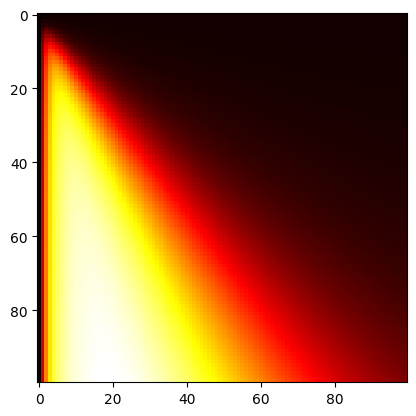

In [72]:
# Parameter Heatmap

bos = range(0, 100, 1)
dos = range(0, 100, 1)
pot = np.zeros((len(bos), len(dos)))
for i, b in enumerate(bos):
    for j, d in enumerate(dos):
        pot[i, j] = sirModel([b/100, d/100])
plt.imshow(pot, cmap='hot', interpolation='nearest')

In [79]:
results = minimize(sirModel, (0.025, 0.1), options={'disp': True}, bounds=((0, 1), (0, 1)))
results

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.42095D+06    |proj g|=  9.00000D-01

At iterate    1    f=  1.67977D+06    |proj g|=  1.00000D+00

At iterate    2    f=  3.13213D+01    |proj g|=  1.00000D+00

At iterate    3    f=  1.83037D+00    |proj g|=  1.00000D+00

At iterate    4    f=  1.82930D+00    |proj g|=  1.00000D+00

At iterate    5    f=  1.82928D+00    |proj g|=  1.00000D+00

At iterate    6    f=  1.82924D+00    |proj g|=  9.99999D-01

At iterate    7    f=  1.82907D+00    |proj g|=  9.99998D-01

At iterate    8    f=  1.82866D+00    |proj g|=  9.99993D-01

At iterate    9    f=  1.82756D+00    |proj g|=  9.99981D-01

At iterate   10    f=  1.82468D+00    |proj g|=  9.99952D-01

At iterate   11    f=  1.81718D+00    |proj g|=  9.99952D-01

At iterate   12    f=  1.79809D+00    |proj g|=  9.99953D-01

At iterate   13    f=  1.7


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


      fun: 0.24642298016633357
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.34138672e-02,  4.03424846e+02])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 249
      nit: 34
     njev: 83
   status: 2
  success: False
        x: array([4.96624755e-02, 9.12774621e-06])


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     35     90     38     0     1   1.341D-02   2.464D-01
  F =  0.24642298016633324     

ABNORMAL_TERMINATION_IN_LNSRCH                              


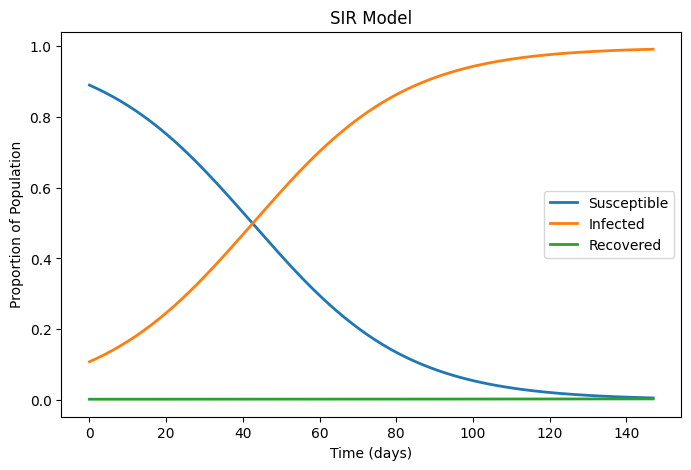

In [82]:
def sirModelResults(bd):
    """
    Function for computing odes for solve_ivp function
    """
    b, d = bd
    t = np.linspace(0, maxTime, 147)
    result = solve_ivp(fun=lambda t, y: sirODE(t, b, d, y[0], y[1], y[2]), t_span=[min(t), max(t)], y0=[s0, i0, r0], t_eval=t)
    df = pd.DataFrame({'t': result.t, 'S': result.y[0], 'I': result.y[1], 'R': result.y[2]})
    return df
dat = sirModelResults(results.x)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(dat['t'], dat['S'], linewidth=2)
ax.plot(dat['t'], dat['I'], linewidth=2)
ax.plot(dat['t'], dat['R'], linewidth=2)
ax.set_xlabel('Time (days)')
ax.set_ylabel('Proportion of Population')
ax.legend(['Susceptible', 'Infected', 'Recovered'])
ax.set_title('SIR Model')
plt.savefig('Q-1.3.3-Calibrated_SIR_Model.png')
plt.show()


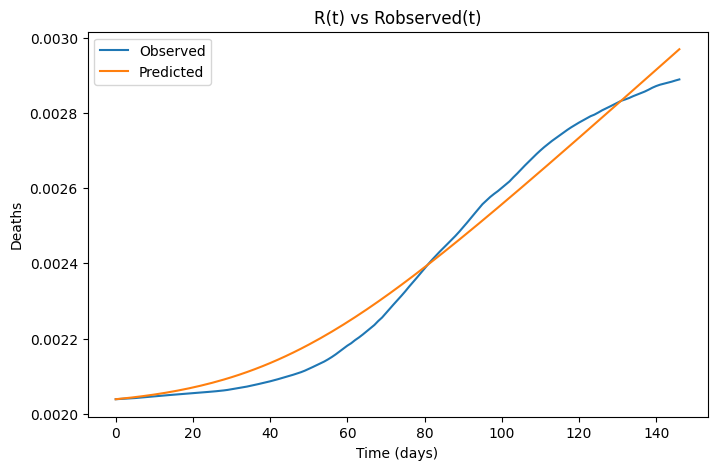

In [83]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(observed['deaths'], label='Observed')
ax.plot(dat['R'], label='Predicted')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Deaths')
ax.legend()
ax.set_title('R(t) vs Robserved(t)')
plt.savefig('Q-1.3.3-Calibrated_R(t)_vs_Ro(t).png')
plt.show()